# **TUGAS 3 Exploratory Data**

Nama:
*  Almas Fauzia Wibawa (17/409427/PA/17734)
*  Aulia Rahmah (16/394077/PA/17168)
*  Sulkha Marfuah (17409457/PA/17754)










Dalam mengerjakan tugas ini, kami menggunakan data harga rumah di suatu area. Di dalamnya, terdapat beberapa informasi/atribut yang dapat mempengaruhi harga rumah tersebut. Akan kita lihat seberapa besar pengaruh setiap atribut lain terhadap atribut harga pada sebuah rumah.



**1.   Mengimpor data ke dalam data set**



Yang perlu kita lakukan pertama kali adalah mengimpor data set yang ingin kita gunakan ke dalam data frame dengan library pandas. Hal ini kita lakukan agar kita dapat leluasa dalam mengolah data dengan library pandas.

In [1]:
import pandas as pd
import numpy as np
import re

###### Mengimport file ke dalam jupyter notebook

In [2]:
dataFrame = pd.read_excel("Real estate valuation data set.xlsx", encoding='latin1')

###### Melihat 5 data pertama dari dataFrame

In [3]:
dataFrame.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1




**2.   Melihat tipe data setiap atribut**



Setelah data dimasukkan ke dalam data frame, kita dapat mulai perhatikan datanya. Pertama-tama, kita perlu ketahui dulu tipe data dari setiap atributnya. Dengan mengetahui tipe datanya, kita dapat mengetahui cara yang tepat untuk mengolah setiap atributnya. Kita dapat perkirakan juga apakah atribut tersebut merupakan variabel kategorikal atau kontinu.

In [4]:
%%capture
! pip install seaborn

##### @Import library seaborn. Library seaborn digunakan untuk memvisualisasikan data frame yang banyak digunakan untuk analisis data.

In [5]:
import seaborn as sns
%matplotlib inline

In [6]:
dataFrame.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Ternyata, semua atribut yang terdapat pada data ini merupakan data numerik, baik itu bertipe data float maupun integer. Semua atribut pada data ini juga merupakan variabel kontinu dan bukan kategorikal.

**3.   Melihat korelasi antar atribut.**

Jika dilihat secara umum, berikut merupakan korelasi antar atributnya satu sama lain.

In [7]:
dataFrame.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Angka yang muncul di atas menunjukkan seberapa besar suatu atribut mempengaruhi atribut lainnya. Karena kami ingin fokus melihat korelasi harga rumah dengan atribut lainnya, kami lakukan plot dengan perbandingan satu per satu.



*   Korelasi harga rumah dengan umur rumah



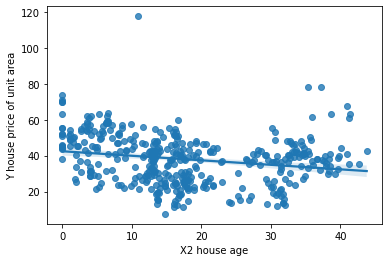

In [8]:
sns.regplot(x="X2 house age", y="Y house price of unit area", data=dataFrame)

Dapat dilihat bahwa beberapa data dengan umur rumah yang rendah memiliki harga yang tinggi. Namun, ada juga rumah yang sudah tua dengan harga tinggi.

In [9]:
dataFrame[["Y house price of unit area", "X2 house age"]].corr()

,Y house price of unit area,X2 house age
Y house price of unit area,1.000000,-0.210567
X2 house age,-0.210567,1.000000


Jika dilihat nilai korelasinya, ternyata memang umur rumah tidak berpengaruh banyak pada harga rumah.

*    Korelasi harga rumah dengan jarak rumah tersebut ke stasiun MRT

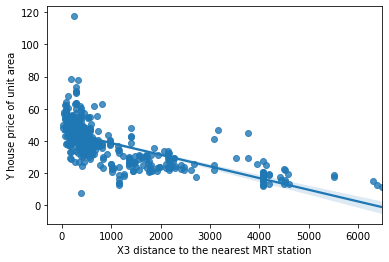

In [10]:
sns.regplot(x="X3 distance to the nearest MRT station", y="Y house price of unit area", data=dataFrame)

Dapat terlihat bahwa rata-rata data semakin dekat suatu rumah dengan stasiun, maka harganya semakin tinggi.

In [11]:
dataFrame[["Y house price of unit area", "X3 distance to the nearest MRT station"]].corr()

,Y house price of unit area,X3 distance to the nearest MRT station
Y house price of unit area,1.000000,-0.673613
X3 distance to the nearest MRT station,-0.673613,1.000000


Jika dilihat nilai korelasinya, variabel jarak rumah ke stasiun MRT ternyata memang cukup berpengaruh dengan nilai -0.67.

*    Korelasi harga rumah dengan jumlah toserba (toko serba ada)

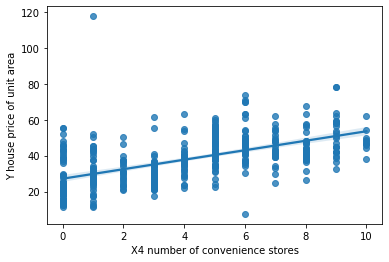

In [12]:
sns.regplot(x="X4 number of convenience stores", y="Y house price of unit area", data=dataFrame)

Bila dilihat dari grafik di atas, banyaknya toserba di sekitar area rumah sedikit berpengaruh dengah harga rumah.

In [13]:
dataFrame[["Y house price of unit area", "X4 number of convenience stores"]].corr()

,Y house price of unit area,X4 number of convenience stores
Y house price of unit area,1.000000,0.571005
X4 number of convenience stores,0.571005,1.000000


Angka korelasinya sedikit lebih dari 0.5. Ini berarti banyaknya toserba memiliki sedikit korelasi dengan harga rumah meskipun pada datanya sebenarnya banyak yang overlap.

*    Korelasi harga rumah dengan latitude





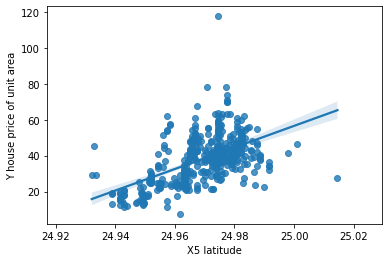

In [14]:
sns.regplot(x="X5 latitude", y="Y house price of unit area", data=dataFrame)

Dapat kita lihat pada grafik di atas, tinggi rendahnya harga rumah sedikit dipengaruhi oleh latitude, meskipun banyak yang overlap.Terlihat pada grafik di atas grafik titik-titik berkumpul di tengah menandakan data tidak terdistribusi dengan baik. 

In [15]:
dataFrame[["Y house price of unit area", "X5 latitude"]].corr()

,Y house price of unit area,X5 latitude
Y house price of unit area,1.000000,0.546307
X5 latitude,0.546307,1.000000


Dilihat dari nilai korelasinya ternyata variabel latitude tidak terlalu besar korelasinya dengan harga rumah.Terdapat sedikit korelasi tetapi banyak yang overlap antar variabel.

*    Korelasi harga rumah dengan longitude




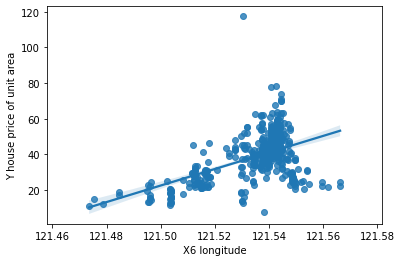

In [16]:
sns.regplot(x="X6 longitude", y="Y house price of unit area", data=dataFrame)

Dilihat dari grafik tersebut latitude dengan house price memiliki sedikit korelasi,  tinggi rendah harga ada yang dipengaruhi dengan nilai longitude dari lokasi pada suatu rumah,walaupun antar variabel banyak yang overlap.Terlihat pada grafik di atas grafik titik-titik berkumpul di tengah menandakan data tidak terdistribusi dengan baik. 

In [17]:
dataFrame[["Y house price of unit area", "X6 longitude"]].corr()

,Y house price of unit area,X6 longitude
Y house price of unit area,1.000000,0.523287
X6 longitude,0.523287,1.000000


Dari nilai korelasi tersebut,  menunjukkan adanya sedikit korelasi antara variabel longitude dengan harga rumah, tetapi antar variabel banyak yang overlap.

**4.   Melihat deskripsi statistik data**

In [18]:
dataFrame.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Dengan command di atas, kita dapat mengetahui beberapa keterangan tambahan mengenai masing-masing variabel. Dapat dilihat bahwa data ini memiliki jumlah data rumah sebanyak 414. Kita juga dapat ketahui rata-rata dari masing-masing variabel, nilai minimalnya, nilai maksimalnya, dan lain-lain.

# **Kesimpulan**

Dengan menggunakan data "Real estate valuation data set.xlsx" yang merupakan kumpulan data harga dan data-data lain berkaitan dengan penjualan rumah, kami telah melakukan exploratory data analisis. Kami memfokuskan pada korelasi yang berkaitan dengan harga rumah(Y house price of unit area) yaitu dengan umur rumah(X2 house age),jarak dengan MRT(X3 distance to the nearest MRT station),jumlah toko terdekat(X4 number of convenience stores),lintang rumah pada peta(X5 latitude),dan bujur ruamah pada peta(X6 longitude)

secara keseluruhan,kami dapatkan bahwa harga kurang begitu berkorelasi dengan keenam data lain tersebut. Korelasi tertinggi harga rumah(Y house price of unit area) adalah dengan jarak rumah ke stasiun MRT(X3 distance to the nearest MRT station) yang memiliki nilai korelasi -0.67, sedangkan korelasi terkecil harga rumah adalah dengan umur rumah(X2 house age) yang memiliki nilai korelasi -0.210567. 

Dengan hasil korelasi antar variabel data yang didapat tersebut, kami berkesimpulan bahwa dataset "Real estate valuation data set.xlsx" kurang baik untuk memprediksi harga rumaah.